In [1]:
%pylab inline
from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
from wallet.util.analysis import _moving_average_statistics
app = create_app(compact=True)

Populating the interactive namespace from numpy and matplotlib


/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
[2020-05-02 16:32:35,153] INFO in core: Started 


2020-04-02


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
M1,20.0,0.262000,0.953999,-1.059994,-0.417504,0.064992,0.762498,2.860013,1.272937,5.282444,1.633851,1.064957
S&P 500,20.0,0.608832,2.418915,-3.036325,-1.059655,0.292189,2.319053,6.716621,0.645418,12.294010,4.744629,0.622080
IRA,20.0,0.641993,2.722755,-3.429998,-1.455018,0.799989,2.017479,7.359966,0.585574,12.872906,6.095327,0.568895
CSI 300,20.0,-0.064936,1.546647,-3.454682,-0.932385,-0.204649,1.116983,2.444612,0.573786,-1.515724,5.284259,-0.269774


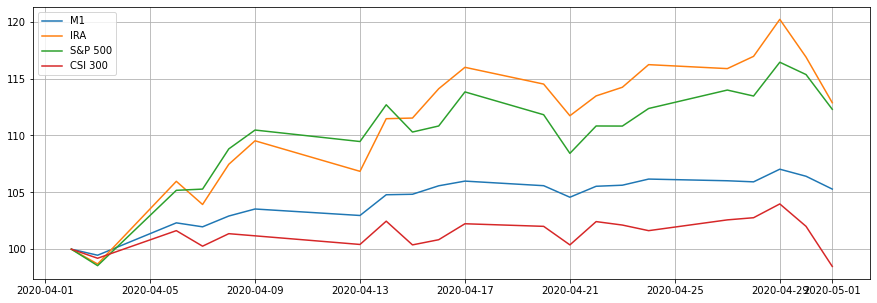

In [2]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 21)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 21)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
frame.plot(figsize=(15, 5), grid=1)
_moving_average_statistics(frame, 1)

2019-10-31


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
M1,103.0,-0.081397,0.784534,-3.100050,-0.198779,0.134018,0.258694,1.420293,1.110193,-9.639772,23.204698,-1.915964
CSI 300,103.0,-0.015301,0.863493,-3.009172,-0.313539,0.240764,0.530469,1.403792,1.085220,-6.287020,20.174870,-1.482794
S&P 500,103.0,-0.064662,1.116393,-3.782368,-0.265033,0.160323,0.341529,3.152724,0.795167,-8.987698,33.717264,-0.805086
IRA,103.0,0.046829,2.037573,-7.145033,-0.000146,0.319909,0.688237,5.842435,0.490392,-1.812023,46.663442,-1.308237


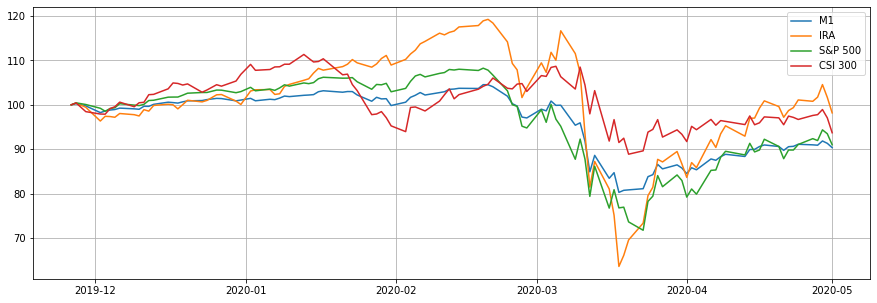

In [3]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 126)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 126)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
frame.plot(figsize=(15, 5), grid=1)
_moving_average_statistics(frame, 5)

In [ ]:
ret = frame.rolling(1).mean().pct_change() * 100
_ = ret.hist(sharex=1, figsize=(15, 5), layout=(2, 2))